In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load in data
df = pd.read_csv('./Data/college_player_data_cleaned.csv')
display(df.head())

,Unnamed: 0,Player,Round,Pick,Draft Year,College,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos
0,0,Stephen Zimmerman Jr.,2,41,2016,UNLV,26,24,26.2,3.9,8.2,3.7,7.6,0.2,0.7,2.4,3.9,2.2,6.6,8.7,0.8,0.5,2.0,2.1,3.0,10.5,0.477,0.492,0.294,0.624,0.519,0.488,F
1,1,Tyler Zeller,1,17,2012,North Carolina,102,73,25.3,5.2,9.5,5.2,9.5,0.0,0.0,3.9,5.0,3.0,4.4,7.4,0.6,0.7,1.2,1.5,2.5,14.3,0.545,0.546,0.000,0.776,0.599,0.545,F
2,2,Cody Zeller,1,4,2013,Indiana,72,72,29.0,5.5,9.4,5.5,9.3,0.0,0.0,5.0,6.6,2.6,4.7,7.3,1.3,1.2,1.2,2.0,2.5,16.1,0.592,0.594,0.000,0.756,0.643,0.592,F
3,3,Marcus Zegarowski,2,49,2021,Creighton,92,75,32.2,5.0,10.5,2.6,5.0,2.3,5.5,1.8,2.3,0.3,3.2,3.5,4.2,1.1,0.1,2.2,1.9,14.1,0.471,0.523,0.423,0.772,0.604,0.582,G
4,4,Trae Young,1,5,2018,Oklahoma,32,32,35.4,8.2,19.3,4.5,9.1,3.7,10.3,7.4,8.6,0.4,3.5,3.9,8.7,1.7,0.3,5.2,1.8,27.4,0.422,0.493,0.360,0.861,0.585,0.518,G


### Correlations

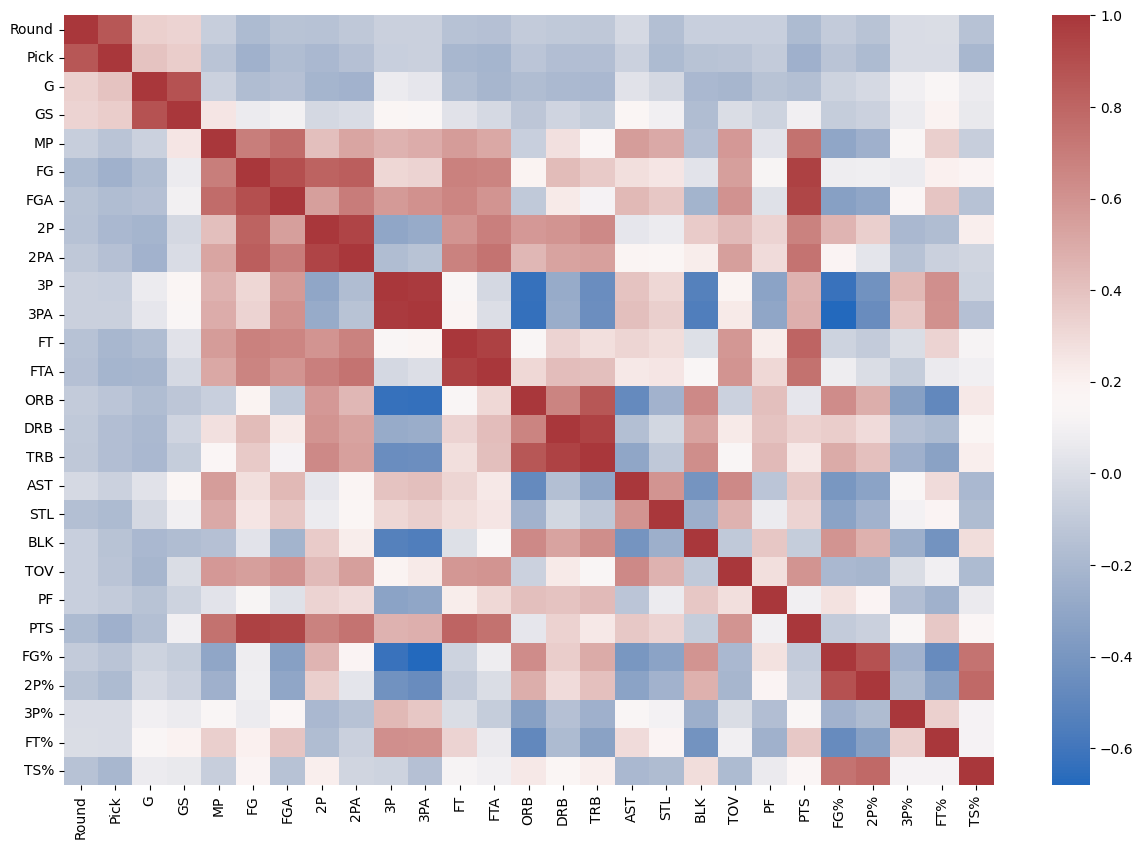

In [4]:
cols_for_corr = ['Round', 'Pick', 'G', 'GS', 'MP', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'TS%']

corr_mat = df[cols_for_corr].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=False, cmap="vlag")
plt.show()

Insights:
- The pick number is positively correlated with games played and games started.  This means that the more games played, the later a player goes in the draft. This makes sense because the higher picked players generally only play one year in college and are then drafted.
- Almost all other stats are negatively correlated with pick number.  This means that players are picked higher (lower pick number), tend to have higher statistics.

Text(0.5, 1.0, 'Correlations with Pick Number')

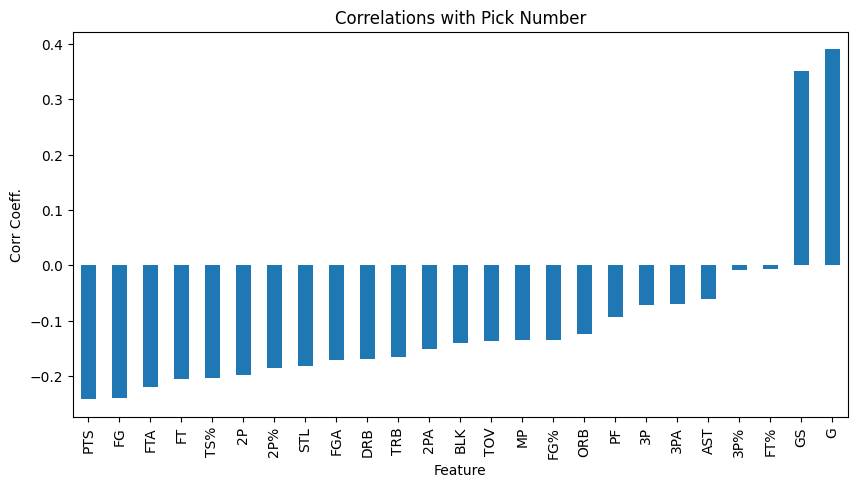

In [5]:
plt.figure(figsize=(10,5))
corr_mat.loc['Pick'].drop(['Pick','Round']).sort_values().plot(kind='bar')
plt.ylabel('Corr Coeff.')
plt.xlabel('Feature')
plt.title('Correlations with Pick Number')

Insights:
- As seen from the previous figure, the only two positive correlations with the pick number are with the number of games and games started.
- We can see that the biggest correlations with draft pick have to do with scoring and how well a player shoots.  This includes points the player scores per game, number of field goals they make, free throws they make, etc.
- One interesting factor that does not directly result in scoring is the free throw attempts.  This is when a player is fouled and gets to take free throws.  Players that are picked higher tend to generate more free throw opportunities.
- TS% is true shooting percentage.  This is calculated by combining a player's field goal percentage, 3-point percentage, and free throw percentage.  These are the three ways a player can score.  This is also correlated with being picked lower.

### Colleges

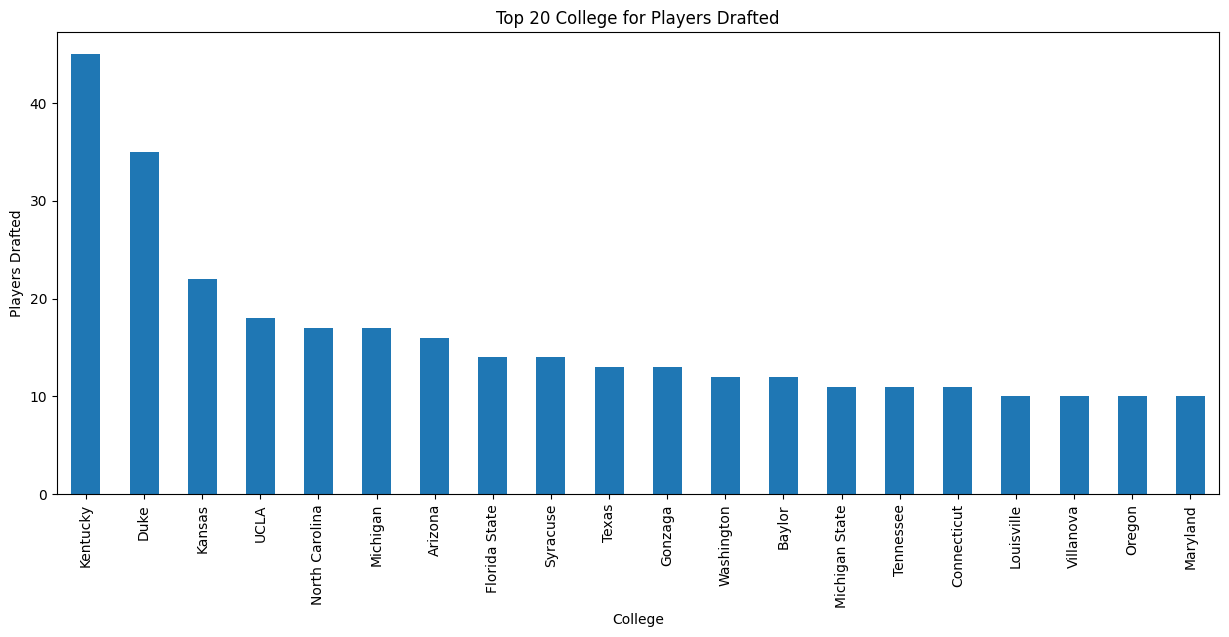

In [21]:
plt.figure(figsize=(15,6))
df['College'].value_counts()[0:20].plot(kind='bar')
plt.title('Top 20 College for Players Drafted')
plt.ylabel('Players Drafted')
plt.show()

Insights:
- Here were are looking at the top 20 colleges that have players drafted.  
- Kentucky, Duke, and Kansas have generated the most players picked.
- What college a player goes to could be important in determining where a player will be drafted.